In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features = pd.read_csv('../data/processed/cancun_filtered_features.csv')

In [3]:
features.head()

,guest_satisfication,host_reviews,monthly_price_factor,picture_count,price,response_rate,reviews_count,weekly_price_factor,listing_key
0,95,311,0.88,19,22,100,50,0.88,20776319
1,99,147,0.85,22,28,100,108,0.90,16492050
2,94,1376,1.00,14,30,100,243,1.00,14266451
3,95,179,0.79,27,24,97,177,0.93,17625889
4,93,631,0.80,18,21,100,194,0.95,18543147


In [4]:
features.shape

(6669, 9)

We have 8 features to create a weighting schema.

**Reliability**
- `host_reviews`
- `reviews_count`


**Quality**
- `response_rate`
- `guest_satisfication`
- `picture_count` -- Still unsure if this is a good indicator or not. I would assume that guests having more pictures put in more effort. After some investigation, I don't believe this should be included anymore!
 

**Suitable for Long Term Stay**
- `weekly_price_factor`
- `monthly_price_factor`

*Note:* I believe that `price` is a filter rather than a variable.



(array([3.029e+03, 2.553e+03, 7.610e+02, 2.260e+02, 6.200e+01, 2.300e+01,
        8.000e+00, 2.000e+00, 3.000e+00, 2.000e+00]),
 array([  1. ,  19.1,  37.2,  55.3,  73.4,  91.5, 109.6, 127.7, 145.8,
        163.9, 182. ]),
 <a list of 10 Patch objects>)

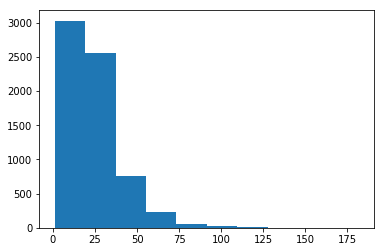

In [5]:
plt.hist(features['picture_count'])

In [6]:
features['picture_count'].describe()

count    6669.000000
mean       24.543260
std        16.231264
min         1.000000
25%        13.000000
50%        21.000000
75%        31.000000
max       182.000000
Name: picture_count, dtype: float64

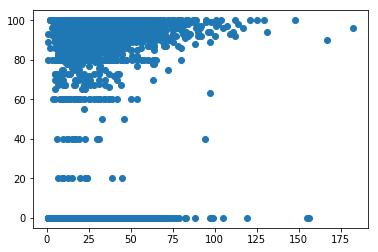

In [7]:
plt.scatter(features['picture_count'], features['guest_satisfication']

In [8]:
# Lots of listings have 0 rating but have a decent amount of pictures. Not significant relationship between picture number and
# guest satisfication.

In [17]:
features['guest_satisfication'].sort_values(ascending=False).head()

4005    100
4729    100
4744    100
2632    100
2642    100
Name: guest_satisfication, dtype: int64

(array([2.206e+03, 0.000e+00, 1.200e+01, 0.000e+00, 1.300e+01, 3.000e+00,
        5.300e+01, 5.900e+01, 5.630e+02, 3.760e+03]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

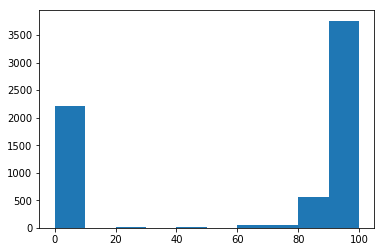

In [18]:
plt.hist(features['guest_satisfication'])

In [36]:
(
    features
    .groupby('guest_satisfication', as_index=False)
    .agg({'listing_key': 'count'})
    .rename(columns={'listing_key': 'counts'})
    .sort_values(by='counts', ascending=False)
    .head(10)
)

,guest_satisfication,counts
0,0,2206
41,100,1195
39,98,379
38,97,340
37,96,331
34,93,284
36,95,280
35,94,234
40,99,201
31,90,194
